## Using PySpark to convert raw dataset into average score, Calculating best teams and finding each teams total wins.

In [1]:
import findspark
findspark.init()
import pyspark as ps

In [2]:
conf = ps.SparkConf().setAppName("proj_1")
sc = ps.SparkContext(conf=conf)

In [3]:
def debug(a):
    with open('awd.txt', 'a') as fp:
        fp.write('\n'+str(a)+'\n')

In [4]:
def average_score(x):
    final_list = [x[0]]
    for i in x[1]:
        i = i[2:]
        i = [int(a) for a in i]
        #debug(i)
        final_list.append(sum(i) / len(i))
        #debug((sum(i) / len(i)))
    return final_list[:12]

In [5]:
op = sc.textFile("IPL_SCORE.csv")\
     .map(lambda x: x.split('\n'))\
     .map(lambda x: x[0].split(','))\
     .filter(lambda x: False if x[0] == 'Team' else True )\
     .groupBy(lambda x: x[0])\
     .map(average_score)
     #.map(lambda x: x[1:])

In [6]:
op = op.collect()

In [7]:
import pandas as pd
df = pd.DataFrame(op)

In [8]:
df = df.transpose()
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

In [9]:
df

,CSK,DC,MI,KXIP,RCB,SRH,RR,KKR
1,30.714286,38.857143,43.142857,69.714286,37.428571,56.142857,52.142857,35.357143
2,46.428571,52.928571,55.214286,55.0,50.357143,50.071429,32.642857,45.428571
3,49.0,29.857143,44.142857,55.428571,42.928571,40.928571,44.714286,36.214286
4,54.357143,42.5,55.357143,48.285714,45.571429,36.285714,53.428571,42.0
5,32.5,43.642857,41.857143,41.714286,43.714286,47.0,32.214286,23.357143
6,38.142857,40.214286,35.857143,20.428571,43.0,57.785714,49.857143,46.071429
7,46.357143,34.428571,36.285714,49.285714,51.642857,45.857143,15.142857,35.5
8,28.214286,40.714286,27.785714,42.214286,29.0,29.857143,46.714286,44.5
9,34.571429,55.714286,46.214286,41.428571,26.5,25.642857,42.142857,41.642857
10,50.285714,43.785714,39.0,47.642857,62.928571,31.571429,54.142857,35.5


In [10]:
df1 = df.apply(pd.to_numeric)


<AxesSubplot:>

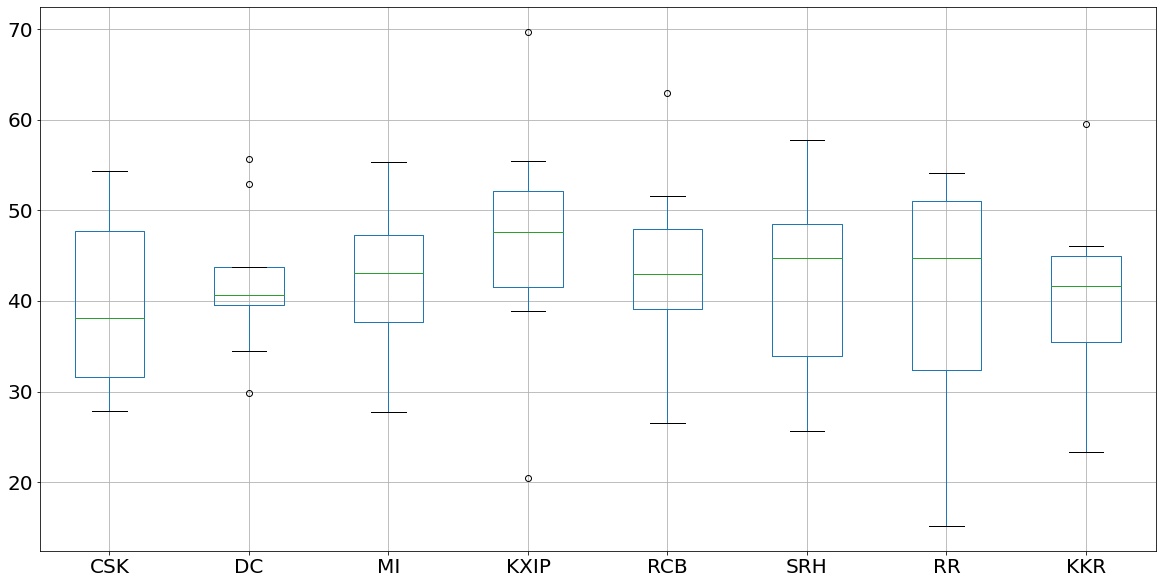

In [11]:
df1.boxplot(figsize=(20,10), fontsize=20)

In [12]:
teams = df1.columns

In [13]:
teams

Index(['CSK', 'DC', 'MI', 'KXIP', 'RCB', 'SRH', 'RR', 'KKR'], dtype='object', name=0)

In [14]:
import itertools
all_matchups = []
for comb in itertools.combinations(teams, 2):
    all_matchups.append(comb)

In [15]:
df_match_up = pd.DataFrame(all_matchups, columns=['team1', 'team2'])

In [16]:
sum_val = df1.sum()


In [17]:
winning_team = []
for i in range(len(df_match_up)) :
    #print(df_match_up.loc[i, "team1"], df_match_up.loc[i, "team2"])
    winner = sum_val[df_match_up.loc[i, "team1"]] - sum_val[df_match_up.loc[i, "team2"]]
    if winner > 0:
        win = df_match_up.loc[i, "team1"]
    else:
        win = df_match_up.loc[i, "team2"]
    text = "%s by %.2f score" % (win, abs(winner))
    winning_team.append(text)

In [18]:
winning_team

['DC by 24.79 score',
 'MI by 34.71 score',
 'KXIP by 71.57 score',
 'RCB by 35.43 score',
 'SRH by 27.50 score',
 'RR by 9.43 score',
 'KKR by 6.64 score',
 'MI by 9.93 score',
 'KXIP by 46.79 score',
 'RCB by 10.64 score',
 'SRH by 2.71 score',
 'DC by 15.36 score',
 'DC by 18.14 score',
 'KXIP by 36.86 score',
 'RCB by 0.71 score',
 'MI by 7.21 score',
 'MI by 25.29 score',
 'MI by 28.07 score',
 'KXIP by 36.14 score',
 'KXIP by 44.07 score',
 'KXIP by 62.14 score',
 'KXIP by 64.93 score',
 'RCB by 7.93 score',
 'RCB by 26.00 score',
 'RCB by 28.79 score',
 'SRH by 18.07 score',
 'SRH by 20.86 score',
 'RR by 2.79 score']

In [19]:
df_match_up['Winner'] = winning_team

In [20]:
df_match_up

,team1,team2,Winner
0,CSK,DC,DC by 24.79 score
1,CSK,MI,MI by 34.71 score
2,CSK,KXIP,KXIP by 71.57 score
3,CSK,RCB,RCB by 35.43 score
4,CSK,SRH,SRH by 27.50 score
5,CSK,RR,RR by 9.43 score
6,CSK,KKR,KKR by 6.64 score
7,DC,MI,MI by 9.93 score
8,DC,KXIP,KXIP by 46.79 score
9,DC,RCB,RCB by 10.64 score


In [21]:
teams

Index(['CSK', 'DC', 'MI', 'KXIP', 'RCB', 'SRH', 'RR', 'KKR'], dtype='object', name=0)

In [22]:
import random
each_20 = []
for team in teams:
    new_matches = []
    while len(new_matches) < 21:
        t = random.choice(teams)
        if t != team:
            result = 0 if (sum_val[team] - sum_val[t] > 0) else 1
            new_matches.append((team, t,  sum_val[team], sum_val[t], result))
    each_20.extend(new_matches)

In [23]:
win_count = {}
for matches in each_20:
    winner = matches[matches[4]]
    win_count[winner] = win_count.get(winner, 0) + 1

In [24]:
win_count

{'SRH': 25, 'KKR': 3, 'KXIP': 42, 'DC': 18, 'RR': 15, 'RCB': 33, 'MI': 32}